In [13]:
#Inports
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Here i link the coordinates from the dataset taellestationer to the datapoints in the dataset trafic
stations = []

for y in range(2005, 2015):
    with open("trafic%d.csv"%y, "r") as csvfile: #Opening the file
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:                 #Going through each row in the file
            if row['Vejnavn'] not in stations:
                stations.append(row['Vejnavn'])
    
print stations
print "The number of stations in copenhagen are: %d"%len(stations)

['Ellebjergvej', 'Englandsvej', 'Fredensbro', 'Frederikssundsvej', 'Hareskovvej', 'Islands Brygge', 'Jagtvej', 'Kalkbr\xc3\xa6nderihavnsgade', 'Kalvebod Brygge', 'S\xc3\xb8lvgade', 'Torvegade', 'Tuborgvej', 'Vejlands Alle\xc2\xb4', 'Vigerslev All\xc3\xa9', '\xc3\x85boulevard', 'Gadelandet', 'Molbechsvej', 'Mozartsvej', 'Skt. Kjelds Gade', 'Wittenberggade', '\xc3\x98restads Boulevard', 'Roskildevej']
The number of stations in copenhagen are: 22


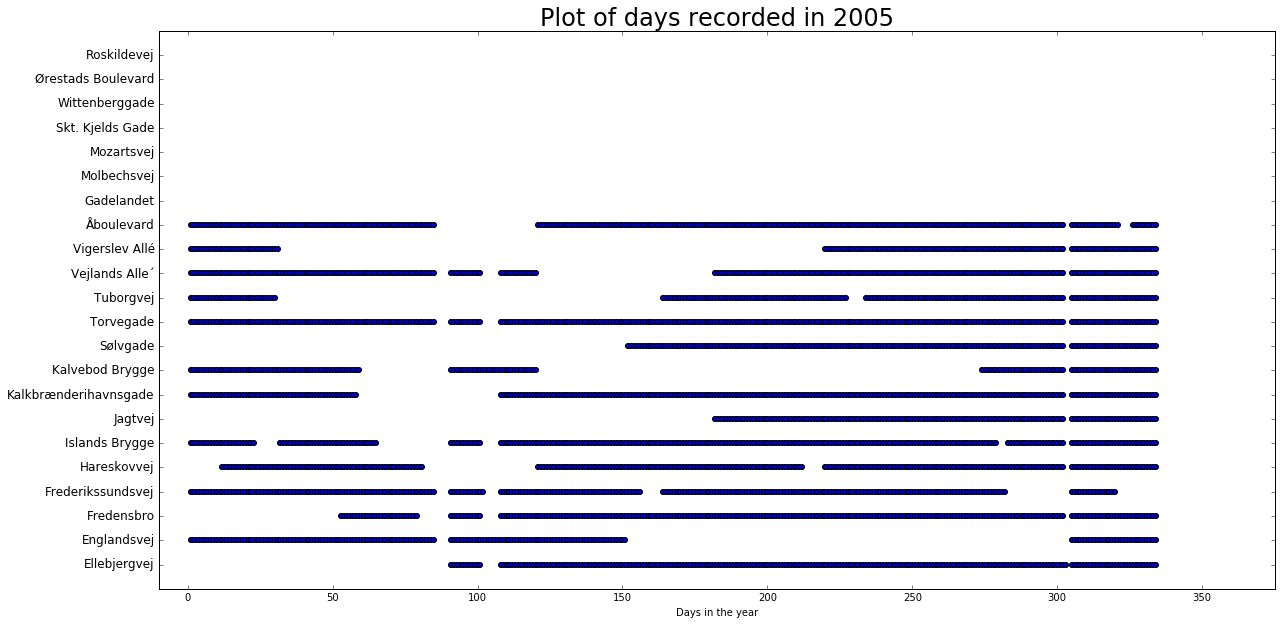

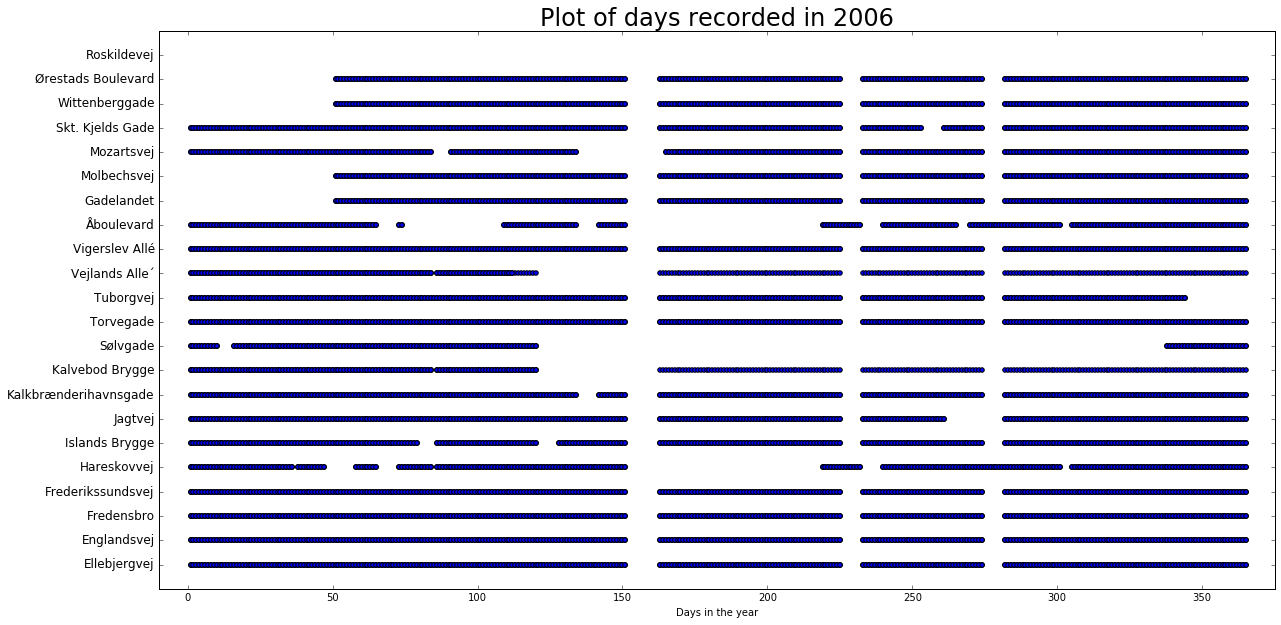

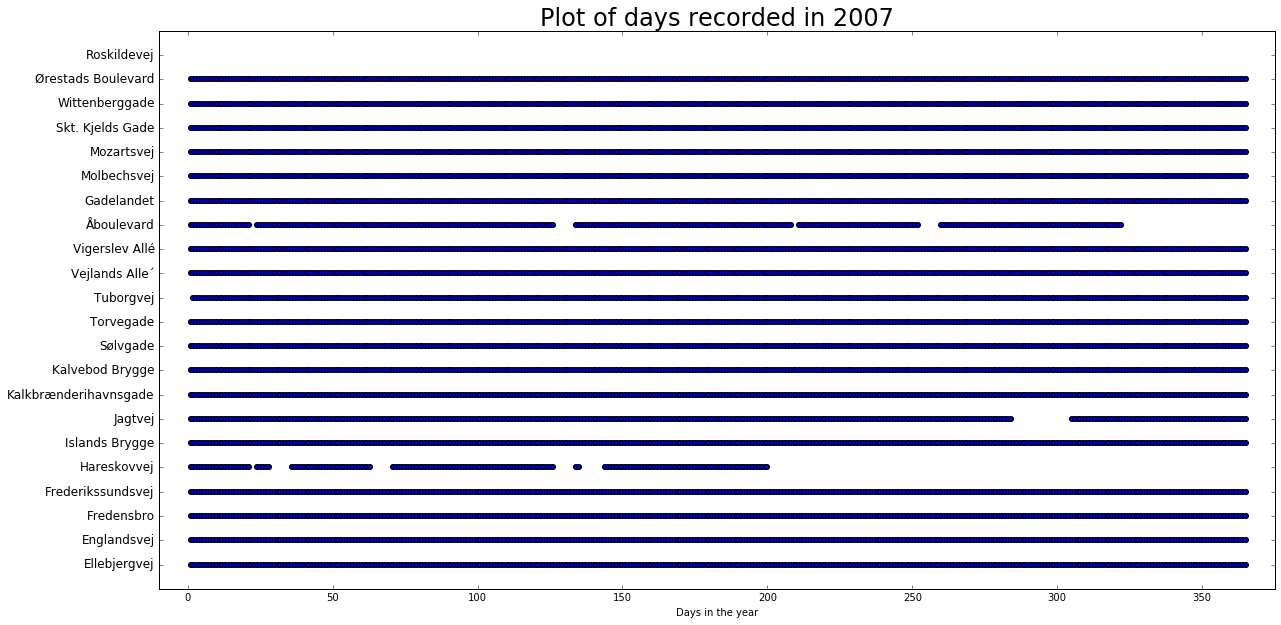

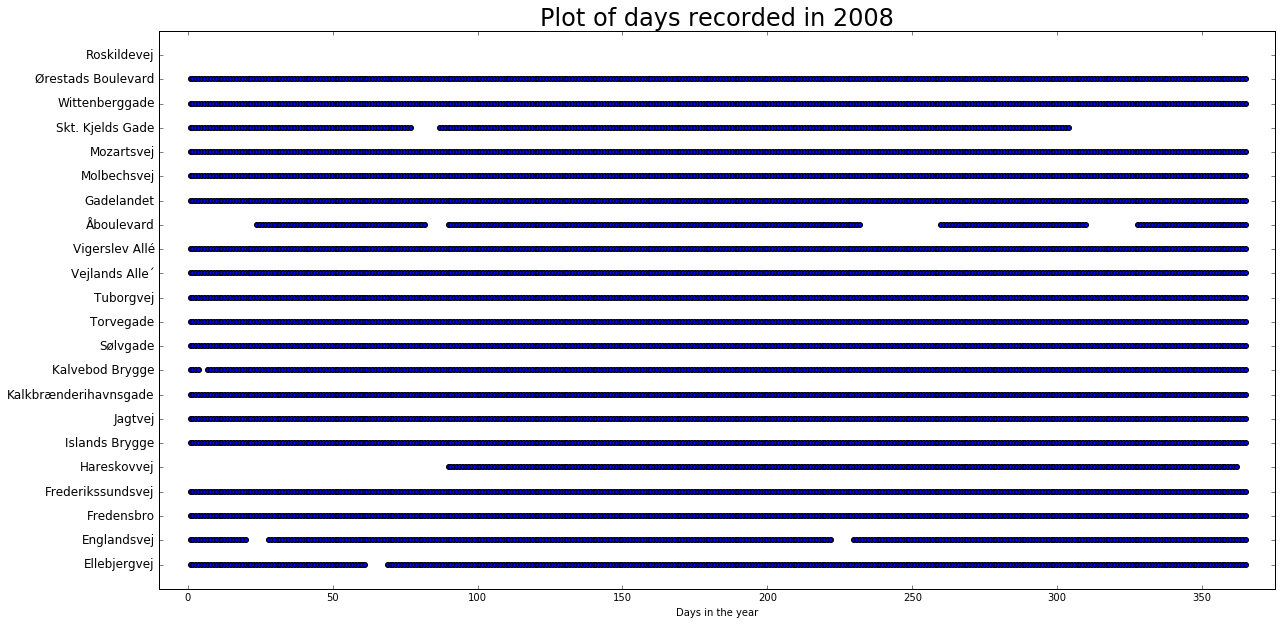

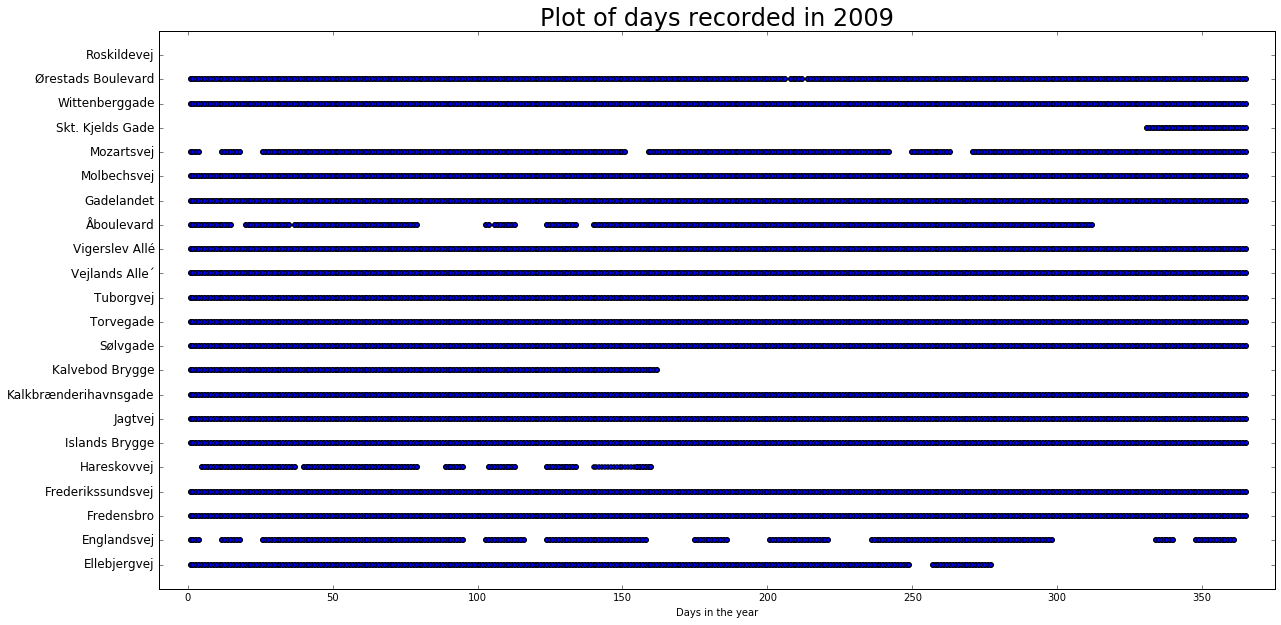

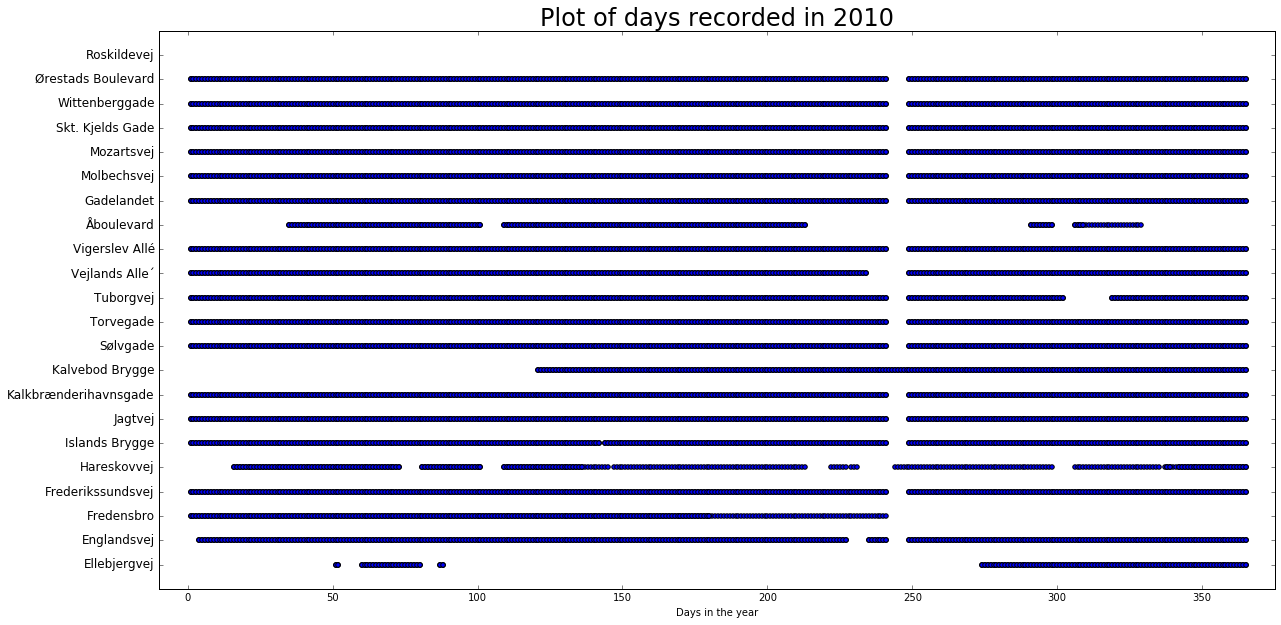

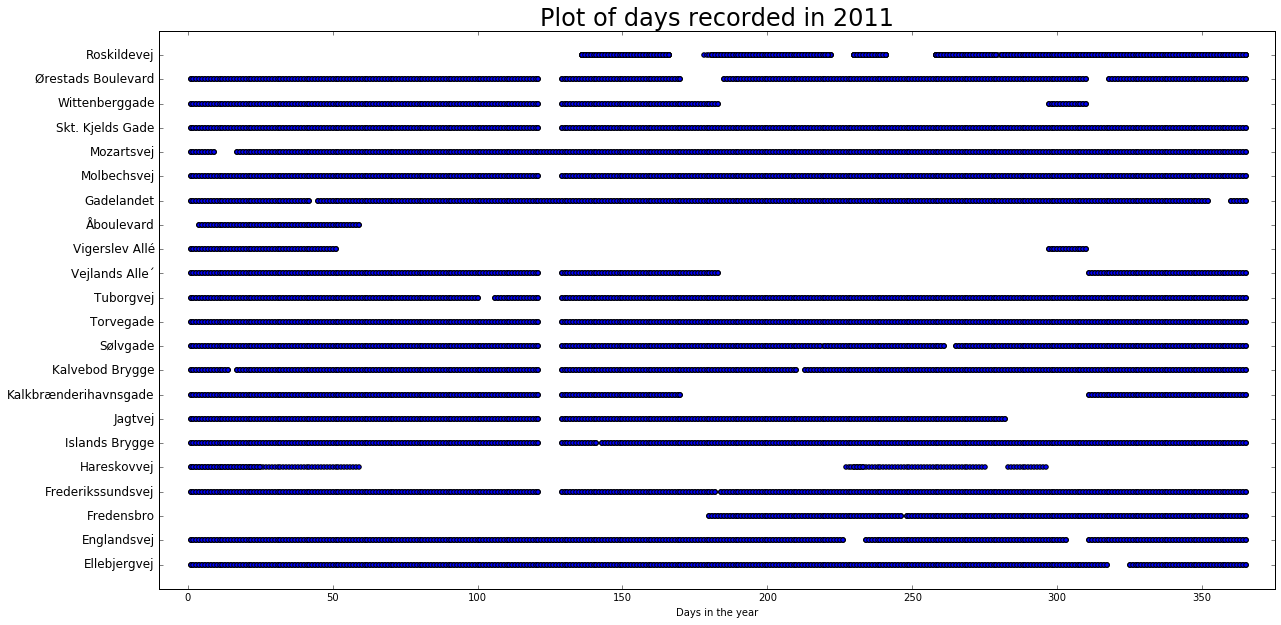

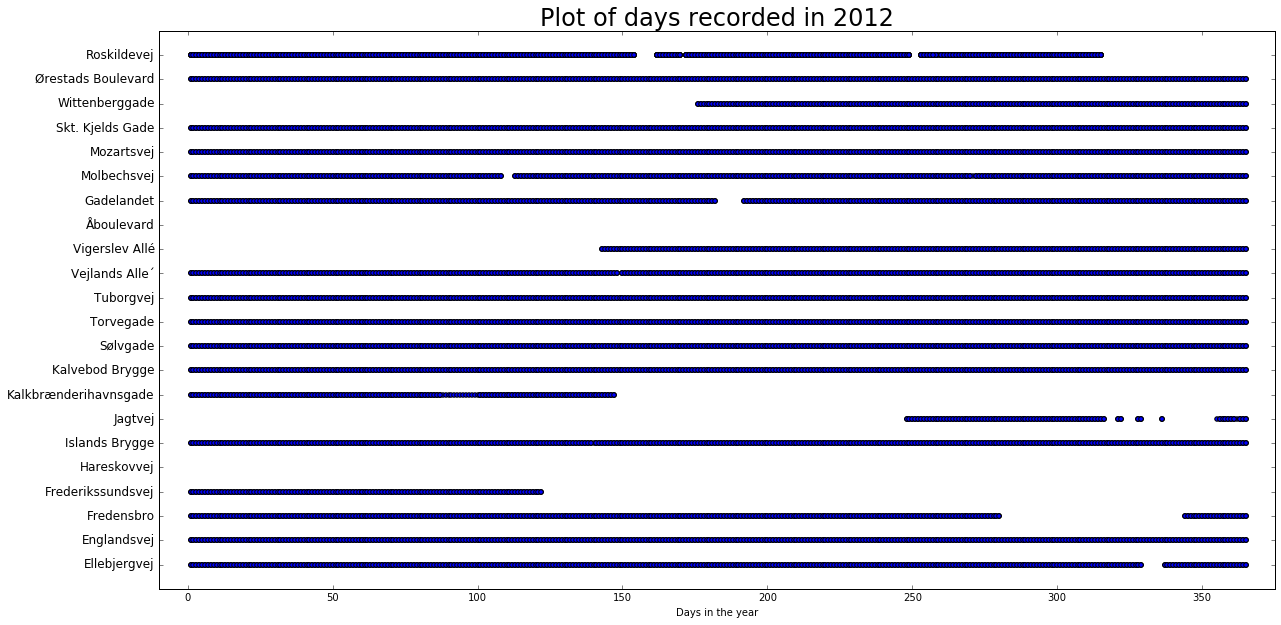

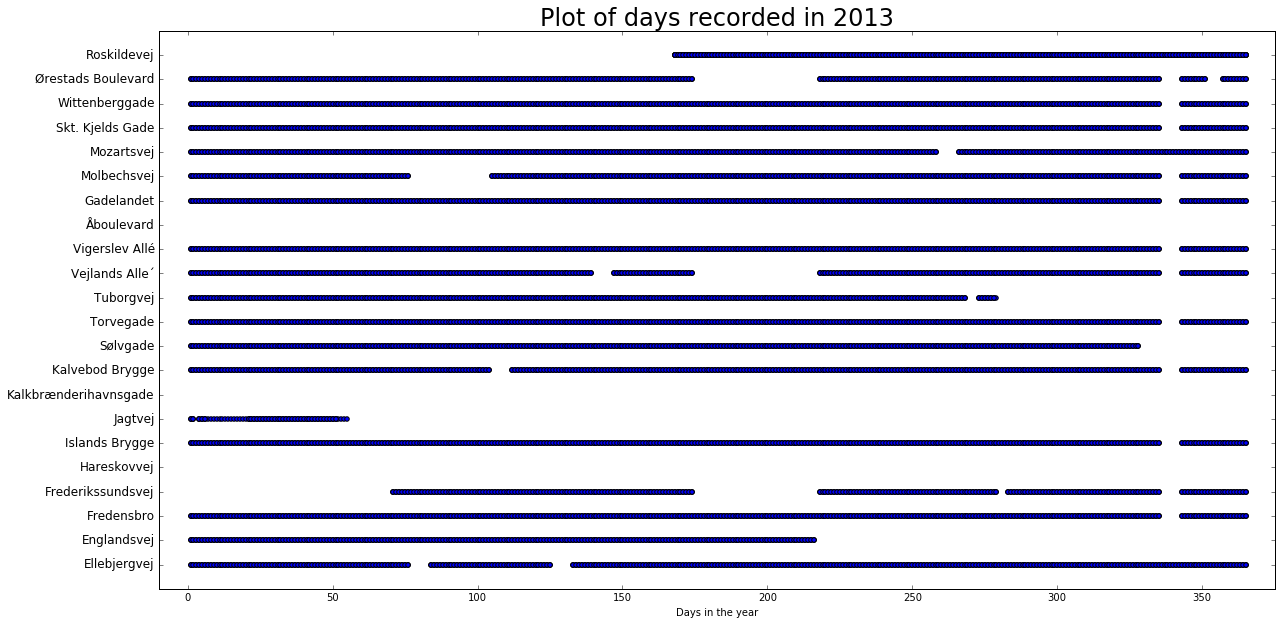

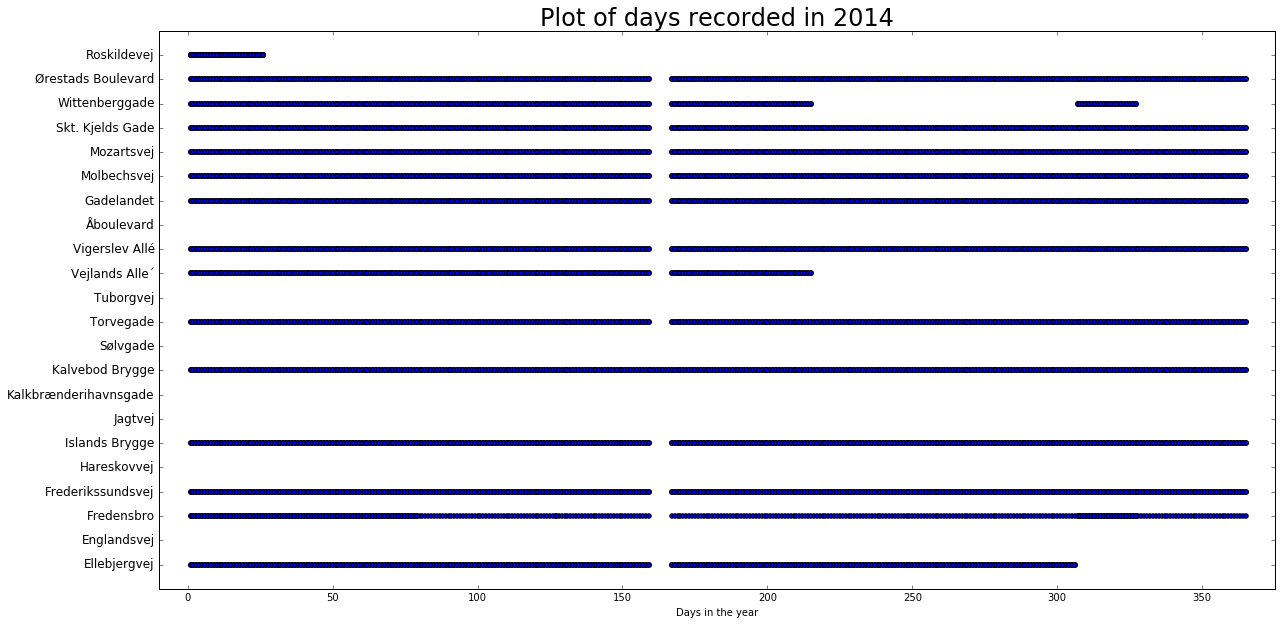

In [12]:
for year in range(2005, 2015):
    recordedDays = {}
    for vej in stations:
        recordedDays[vej] = []
    
    with open("trafic%s.csv"%year, "r") as csvfile: #Opening the file
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:                 #Going through each row in the file
            if row['Vejnavn'] not in recordedDays:
                recordedDays[row['Vejnavn']] = []
                recordedDays[row['Vejnavn']].append(row['Dato'])
            else:
                recordedDays[row['Vejnavn']].append(row['Dato'])

    #I now have the names of the streets for each day they have recorded

    #To do this i first create a dataset of the number of days in each month. I've taken the liberty to remove gap years.
    daysInMonth = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    #Next i give each street a value (1 - 22).

    for i in range(0, len(stations)):
        count = 0
        streetName = stations[i]
        x = []
        y = []
        if streetName in recordedDays:
            for day in recordedDays[streetName]:
                date = day.split('.')
                count = count + 1
                if int(date[1]) == 1:
                    count = count + 1
                daysForMonths = 0
                if int(date[1]) != 1:
                    for month in range(0, int(date[1])-1):
                        daysForMonths = daysForMonths + daysInMonth[month]

                x.append(float(date[0]) + daysForMonths)
                y.append(i)
        plt.scatter(x, y)

        
    unicodedNames = []
    for name in stations:
        unicodedNames.append(name.decode('utf8'))
    
    # plt.scatter(x, y)
    plt.yticks(np.arange(0, len(unicodedNames), 1), unicodedNames, size='large')
    plt.margins(0.05)
    plt.xlabel("Days in the year")
    plt.title("Plot of days recorded in %s"%year, fontsize = 24)
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.ylim([-1,len(stations)])
    plt.xlim([-10,375])
    plt.savefig('recording_days_%s.png'%year)
    plt.show()